In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from zlib import crc32

C:\Users\Renan Lemes\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Renan Lemes\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(DOWNLOAD_ROOT)
print(HOUSING_PATH)
print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml2/master/
datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [3]:
def load_housing_data(housing_path="D:\\Projeto_\\BookGettoWorkMachineLearning\\data\\datasets\\housing\\"):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
df = load_housing_data()

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

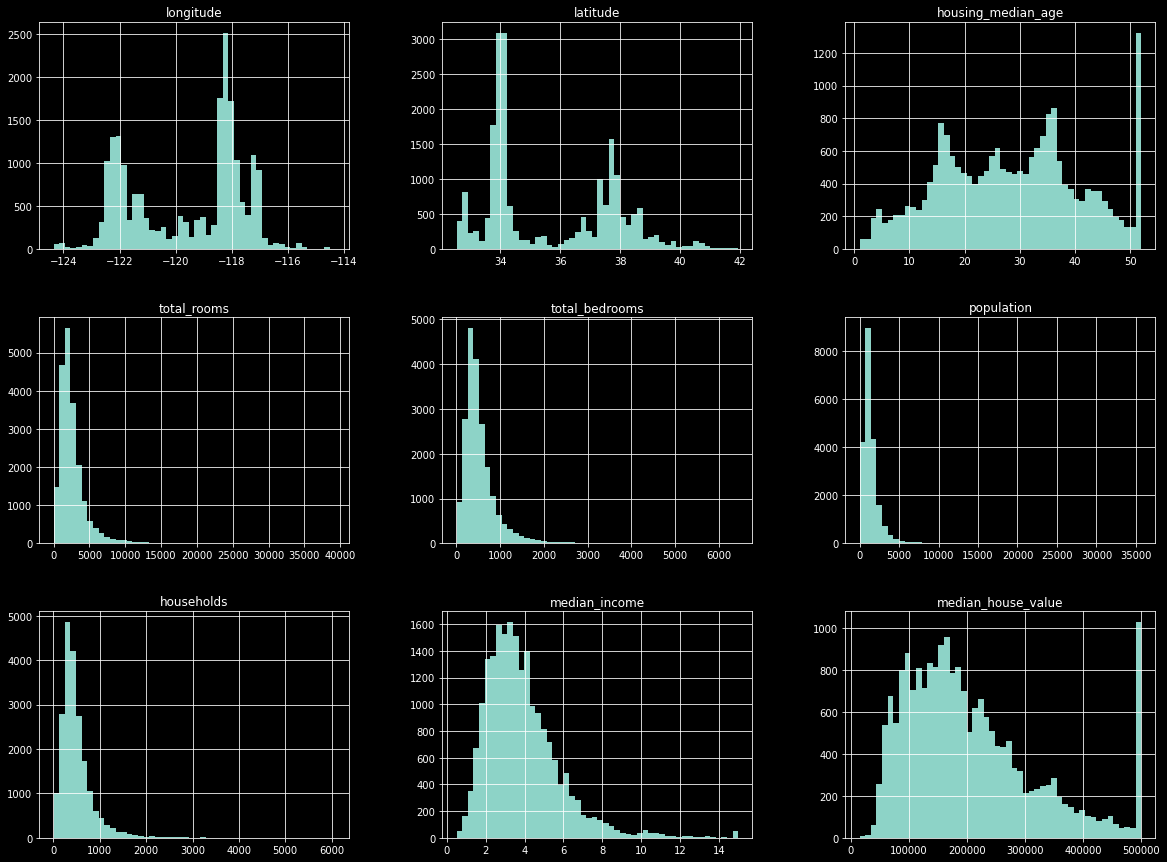

In [6]:
df.hist(bins=50, figsize=(20,15))

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(df, 0.2)

In [10]:
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff < test_ratio * 2**32)
    

In [12]:
def split_train_test_by_id(data, test_ratio, id_column):
    import hashlib
    import numpy as np
    
    def test_set_check(identifier, test_ratio, hash):
        return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hashlib.md5))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [14]:
housing_with_id["id"] = df["longitude"] * 1000 * df["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [15]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-4630072.4
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-4627249.2
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-4627162.5
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-4627162.5
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-4627162.5
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-4780633.2
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-4786582.9
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-4779704.6
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-4783647.6


In [16]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0.,1.5, 3.0, 4.5, 6., np.Inf], labels=[1,2,3,4,5])

In [17]:
## Fazer uma amostra estratificada 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
df["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [19]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [20]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


<Axes: xlabel='longitude', ylabel='latitude'>

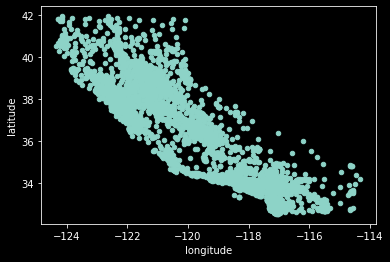

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

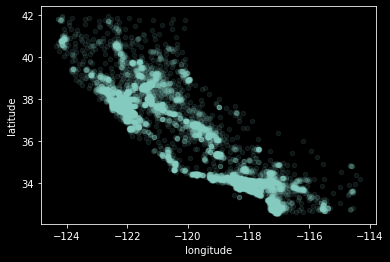

In [22]:
df.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

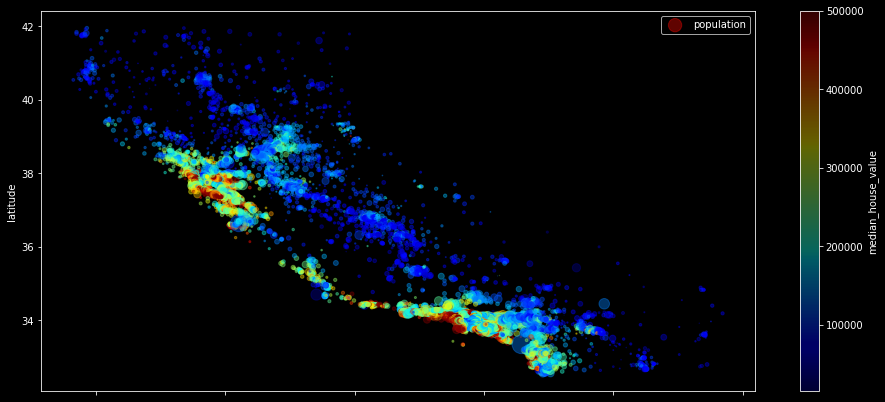

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(16,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
df_dp = df.drop("ocean_proximity", axis=1)

In [26]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   income_cat          20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [27]:
corr_matrix = df_dp.corr()

In [28]:
df["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

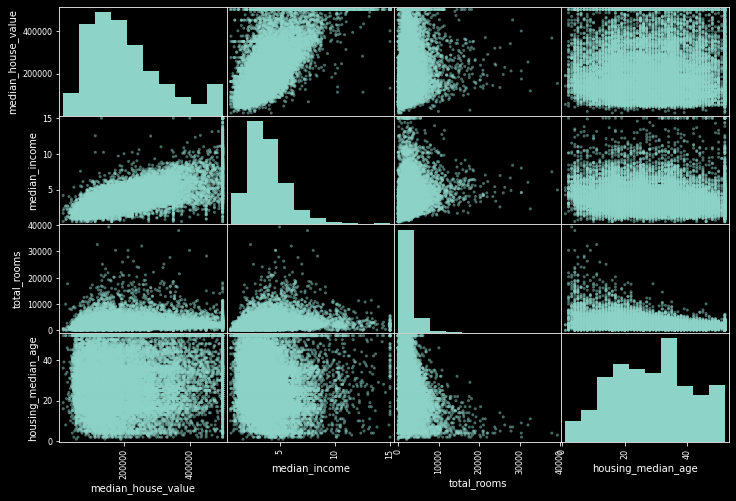

In [31]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(df[attributes], figsize=(12,8))

#### Limpando os dados 

In [32]:
df.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [33]:
df.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [34]:
median = df["total_bedrooms"].median()

In [35]:
df["total_bedrooms"].fillna(median, inplace=True)

C:\Users\RENANL~1\AppData\Local\Temp/ipykernel_12648/1652073781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(median, inplace=True)


In [36]:
from sklearn.impute import SimpleImputer

In [37]:
impute = SimpleImputer(strategy="median")

In [38]:
impute

SimpleImputer(strategy='median')

In [39]:
df_housing_num = df.drop("ocean_proximity", axis=1)


In [40]:
impute.fit(df_housing_num)

SimpleImputer(strategy='median')

In [41]:
impute.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [42]:
X = impute.transform(df_housing_num)

In [43]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  5.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  5.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  5.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  2.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  2.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  2.0000e+00]])

In [44]:
housing_tr = pd.DataFrame(X, columns=df_housing_num.columns, index=df_housing_num.index)

In [45]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [46]:
housing_cat = df[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [47]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [48]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB


### OrdinalEncode
* Usado para uma ordem significativa como baixo medio ou alto 
* Ou seja variaveis categoricas onde deriva demais suas categorias

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
cat = pd.get_dummies(housing_cat, columns=["ocean_proximity"], prefix=["ocean_proximity"])

In [51]:
original_encoder = OrdinalEncoder()
housing_cat_encoder = original_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_encoder

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [53]:
original_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Outra forma de transformar e com o OneHotEncode
* E mais usado em variaveis binarias como azul vermelho verde etc ...

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
cat_encode = OneHotEncoder()

In [56]:
housing_cat_onecode = cat_encode.fit_transform(housing_cat)


In [57]:
housing_cat_onecode

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [58]:
housing_cat_onecode.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
cat_encode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

In [61]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [62]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
     
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, bedrooms_ix] / X[:, population_ix]
        population_per_household = X[:, bedrooms_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else :
            return np.c_[X, rooms_per_household, population_per_household]

#### CombinedAttributesAdder
* rooms_per_household -> Calcula o numero de quartos pelo numero de habitantes
* population_per_household -> Calcula o numero de habitates por numero de domicilios


In [63]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)


In [64]:
housing_extra_attribs = attr_adder.transform(df.values)

In [65]:
housing_extra_attribs

array([[-122.23, 37.88, 41.0, ..., 5, 0.40062111801242234,
        1.0238095238095237],
       [-122.22, 37.86, 21.0, ..., 5, 0.4606413994169096,
        0.9718804920913884],
       [-122.24, 37.85, 52.0, ..., 5, 0.38306451612903225,
        1.073446327683616],
       ...,
       [-121.22, 39.43, 17.0, ..., 2, 0.4816285998013903,
        1.120092378752887],
       [-121.32, 39.43, 18.0, ..., 2, 0.5519568151147098,
        1.171919770773639],
       [-121.24, 39.37, 16.0, ..., 2, 0.4441240086517664,
        1.1622641509433962]], dtype=object)

------------------
#### Escalonamento dos dados


In [66]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [67]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

In [68]:
housing_num_tr = num_pipeline.fit_transform(df_housing_num)


In [126]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])


housing_prepared =  full_pipeline.fit_transform(df)

____

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [72]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [73]:
housing_labels = df["median_house_value"].copy()

In [74]:
len(housing_labels)

20640

In [75]:
len(housing_prepared)

20640

In [76]:
lin_reg = LinearRegression()

In [77]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [78]:
## testando nos dados de teste o modelo para verificar como ele ta funcionando

some_data = df[:5]
some_labels = df.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [452600. 358500. 352100. 341300. 342200.]
Labels: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'income_cat']


In [79]:
## Calculando o RMSE do modelo linear para verificar sua consistencia 

from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)



In [80]:
print("mse: ", lin_mse)
print("rmse: ", lin_rmse)

mse:  3.209174533740287e-20
rmse:  1.7914169067361977e-10


### RMSE
* Significa que nosso modelo esta tendo um valor muito baixo ou seja está as previsões são praticamente identicas

### MSE
* Erro medio quadrático, é uma métrica mais sensível aos outliers, como teve um valor proximo de zero então significa um bom desempenho do modelo. 

___

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_rg = DecisionTreeRegressor()

tree_rg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [82]:
housing_predictions = tree_rg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)


In [83]:
print("mse: ", tree_mse)
print("rmse: ", tree_rmse)

mse:  0.0
rmse:  0.0


In [84]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(tree_rg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [85]:
tree_rmse_score = np.sqrt(-score)

In [86]:
display(tree_rmse_score)

array([ 75.8990047 , 118.86087235,  94.25092529,  73.72954979,
       117.0743155 ,  68.73017685,  72.67054253, 178.08058368,
       112.49461658,  54.09580935])

In [87]:
lin_score = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)


In [88]:
display(lin_score)

array([-1.37010862e-20, -1.21315104e-19, -2.38168511e-20, -6.63956461e-20,
       -7.97230775e-20, -6.07022838e-20, -2.53677955e-20, -7.17040680e-20,
       -2.11377605e-20, -4.69267128e-20])

In [89]:
lin_rmse_score = np.sqrt(-lin_score)

In [90]:
display(lin_rmse_score)

array([1.17051639e-10, 3.48303178e-10, 1.54327091e-10, 2.57673526e-10,
       2.82352754e-10, 2.46378335e-10, 1.59272708e-10, 2.67776153e-10,
       1.45388310e-10, 2.16625744e-10])

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_reg = RandomForestRegressor()

In [93]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [94]:
forest_score = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)


In [95]:
forest_rmse = np.sqrt(-forest_score)
forest_rmse

array([ 47.05653945, 137.34329472,  49.34074861,  36.81019302,
        89.18758093,  37.57174016,  57.81032688,  56.51213881,
        62.87226345,  40.85394826])

In [96]:
forest_rmse.mean()

61.53587743004118

In [97]:
forest_rmse.std()

29.19595650389872

In [98]:
import joblib

In [99]:
joblib.dump(forest_reg, "forest_reg.pkl")
joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_rg, "tree_rg.pkl")


['tree_rg.pkl']

In [100]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

In [109]:
forest_reg = RandomForestRegressor()

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [112]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
## assim podemos ter o melhor combinação de parametros
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [116]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [117]:
cvres = grid_search.cv_results_

In [118]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

38426.99901511634 {'max_features': 2, 'n_estimators': 3}
33546.75620592139 {'max_features': 2, 'n_estimators': 10}
31833.46356414242 {'max_features': 2, 'n_estimators': 30}
22578.51242633049 {'max_features': 4, 'n_estimators': 3}
17379.780985022502 {'max_features': 4, 'n_estimators': 10}
14977.101811548318 {'max_features': 4, 'n_estimators': 30}
14727.71117940656 {'max_features': 6, 'n_estimators': 3}
11258.329568861696 {'max_features': 6, 'n_estimators': 10}
7803.978048868106 {'max_features': 6, 'n_estimators': 30}
6862.6570519993165 {'max_features': 8, 'n_estimators': 3}
4563.435972470862 {'max_features': 8, 'n_estimators': 10}
4209.716720728673 {'max_features': 8, 'n_estimators': 30}
45616.939925342296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
31401.844855200135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
31506.1960886095 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
23089.06076378761 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [119]:
features_importances = grid_search.best_estimator_.feature_importances_

In [122]:
features_importances

array([3.82093937e-03, 4.10733570e-03, 3.39042790e-03, 8.22977305e-04,
       9.46366820e-04, 8.60564633e-04, 6.23608564e-04, 1.37296449e-01,
       7.13632403e-01, 5.32609786e-02, 1.52513857e-02, 1.02588161e-03,
       7.19940504e-03, 1.97007581e-03, 5.46811193e-02, 1.10880483e-07,
       3.90203658e-05, 1.07095095e-03])

In [123]:
extra_attribs = ['room_per_hhold', 'pop_per_hhold', 'bedroms_per_room']


In [128]:
## Vamos exibir os scores e com cada categoria do df
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(features_importances, attributes))

[(0.0006236085642335724, 'households'),
 (0.0008229773047162691, 'total_rooms'),
 (0.0008605646334365582, 'population'),
 (0.0009463668200051132, 'total_bedrooms'),
 (0.0010258816105585052, 'pop_per_hhold'),
 (0.0019700758096452857, 'a'),
 (0.0033904278969020306, 'housing_median_age'),
 (0.0038209393685052213, 'longitude'),
 (0.004107335696972888, 'latitude'),
 (0.007199405038188994, 'bedroms_per_room'),
 (0.015251385682134333, 'room_per_hhold'),
 (0.053260978639947464, 'income_cat'),
 (0.13729644882635028, 'median_income'),
 (0.713632402586883, 'median_house_value')]

Com essas informações podemos retirar as variaveis que tem menor desempenho.